# Importing the Libraries

In [489]:
import pandas as pd
import numpy as np

# Importing Dataset

In [490]:
data = pd.read_csv('heart.csv')

# Taking care of missing Values

In [491]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

# Taking Care of Duplicate Values

In [492]:
data_dup = data.duplicated().any()

In [493]:
data_dup

True

In [494]:
data = data.drop_duplicates()

In [495]:
data_dup = data.duplicated().any()

In [496]:
data_dup

False

# Data Processing

In [497]:
cate_val = []
cont_val = []

for column in data.columns:
    if data[column].nunique()<= 10:
        cate_val.append(column)
    else:
        cont_val.append(column)

In [498]:
cate_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [499]:
cont_val

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

# Encoding Data

In [500]:
cate_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [501]:
data['cp'].unique()

array([0, 1, 2, 3], dtype=int64)

In [502]:
cate_val.remove('sex')
cate_val.remove('target')

data=pd.get_dummies(data,columns = cate_val, drop_first=True)

In [503]:
data.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,52,1,125,212,168,1.0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
1,53,1,140,203,155,3.1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,70,1,145,174,125,2.6,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,61,1,148,203,161,0.0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
4,62,0,138,294,106,1.9,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0


# Feature Scaling

In [504]:
data.head(5)

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,52,1,125,212,168,1.0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
1,53,1,140,203,155,3.1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,70,1,145,174,125,2.6,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,61,1,148,203,161,0.0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
4,62,0,138,294,106,1.9,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0


In [505]:
from sklearn.preprocessing import StandardScaler

In [506]:
st = StandardScaler()

data[cont_val] = st.fit_transform(data[cont_val])

In [507]:
data.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,-0.267966,1,-0.376556,-0.667728,0.806035,-0.037124,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
1,-0.157260,1,0.478910,-0.841918,0.237495,1.773958,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,1.724733,1,0.764066,-1.403197,-1.074521,1.342748,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,0.728383,1,0.935159,-0.841918,0.499898,-0.899544,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
4,0.839089,0,0.364848,0.919336,-1.905464,0.739054,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0


# Splitting The Dataset Into The Training and Test set

In [508]:
X= data.drop('target',axis = 1)

In [509]:
Y = data['target']

In [510]:
from sklearn.model_selection import train_test_split

In [511]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.25, random_state = 42)

In [512]:
# X_train

In [513]:
# Y_train

In [514]:
# X_test

In [515]:
# Y_test

# Logistic Regression

In [516]:
from sklearn.linear_model import LogisticRegression

In [517]:
log = LogisticRegression()
log.fit(X_train, Y_train)

LogisticRegression()

In [518]:
y_pred1 = log.predict(X_test)

In [519]:
from sklearn.metrics import accuracy_score

In [520]:
a=accuracy_score(Y_test, y_pred1)

# SVC (Support Vector Classifire)

In [521]:
from sklearn import svm

In [522]:
svm = svm.SVC()

In [523]:
svm.fit(X_train, Y_train)

SVC()

In [524]:
y_pred2 = svm.predict(X_test)

In [525]:
b=accuracy_score(Y_test, y_pred2)

# KNeighbore Classifire

In [526]:
from sklearn.neighbors import KNeighborsClassifier

In [527]:
# knn =KNeighborsClassifier()

In [528]:
# knn.fit(X_train, Y_train)

In [529]:
# y_pred3 = knn.predict(X_test)

In [530]:
# accuracy_score(Y_test, y_pred3)

In [531]:
# Check The Accuracy of model on diffrent n_neighbors values
score =[]

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, Y_train)
    y_pred4 = knn.predict(X_test)
    score.append(accuracy_score(Y_test, y_pred4))

max(score)

0.7894736842105263

In [532]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, Y_train)
y_pred4 = knn.predict(X_test)
c=accuracy_score(Y_test, y_pred4)

# Non-Linear ML Algorithms

In [533]:
data = pd.read_csv('heart.csv')

In [534]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [535]:
data = data.drop_duplicates()

In [536]:
data.shape

(302, 14)

In [537]:
X = data.drop('target', axis =1)
Y = data['target']

In [538]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size =0.2, random_state = 42)

# Decision Tree Classifier

In [539]:
from sklearn.tree import DecisionTreeClassifier

In [540]:
dt =DecisionTreeClassifier()

In [541]:
dt.fit(X_train, Y_train)

DecisionTreeClassifier()

In [542]:
y_pred5 = dt.predict(X_test)

In [543]:
d=accuracy_score(Y_test, y_pred5)

# Random Forest Classifire

In [544]:
from sklearn.ensemble import RandomForestClassifier 

In [545]:
rf =RandomForestClassifier()

In [546]:
rf.fit(X_train, Y_train)

RandomForestClassifier()

In [547]:
y_pred6 = rf.predict(X_test)

In [548]:
e=accuracy_score(Y_test, y_pred6)

# Gradient Boosting Classifier

In [549]:
from sklearn.ensemble import GradientBoostingClassifier

In [550]:
gb =GradientBoostingClassifier()

In [551]:
gb.fit(X_train, Y_train)

GradientBoostingClassifier()

In [552]:
y_pred7 = gb.predict(X_test)

In [553]:
f=accuracy_score(Y_test, y_pred7)

In [554]:
final_data = pd.DataFrame({'Models':['LR', 'SVM', 'KNN','DT','RF','GB' ],
                          'ACC':[a,
                                b,
                                c,
                                d,
                                e,
                                f]})

In [555]:
final_data

,Models,ACC
0,LR,0.828947
1,SVM,0.815789
2,KNN,0.789474
3,DT,0.704918
4,RF,0.852459
5,GB,0.803279


# Visualization Of Accuracy

In [556]:
import seaborn as sns

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


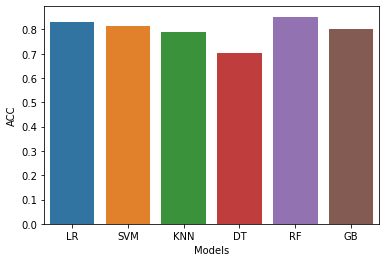

In [560]:
sns.barplot(final_data['Models'], final_data['ACC']);

In [561]:
x = data.drop('target',axis = 1)
y = data['target']

In [562]:
x.shape

(302, 13)

In [563]:
from sklearn.ensemble import RandomForestClassifier

In [564]:
rf = RandomForestClassifier()

In [565]:
rf.fit(x,y)

RandomForestClassifier()

# Predict On New Data

In [567]:
import pandas as pd

In [605]:
new_data = pd.DataFrame({
    'age': 52,
    'sex': 1,
    'cp': 3,
    'trestbps':345,
    'chol':552,
    'fbs':1,
    'restecg':1,
    'thalach':490,
    'exang':0,
    'oldpeak':2.0,
    'slope':3,
    'ca':2,
    'thal':3,
}, index = [0])

In [606]:
new_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,3,345,552,1,1,490,0,2.0,3,2,3


In [607]:
p=rf.predict(new_data)
if p[0]==0:
    print("No Disease")
else:
    print("Disease")

Disease


# Save Model using Joblib

In [590]:
import joblib

In [591]:
joblib.dump(rf,'Heart_Disease_Model')

['Heart_Disease_Model']

In [593]:
model = joblib.load('Heart_Disease_Model')

In [594]:
p = model.predict(new_data)
if p[0]==0:
    print('No Disease')
else:
    print('Disease')

No Disease
